In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import tree
import time
import seaborn as sns
from sklearn import svm

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [3]:
df = pd.read_csv('datasets/mobile_price/train.csv')
print('df shape: ', df.shape) 

df shape:  (2000, 21)


In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.price_range.unique()

array([1, 2, 3, 0], dtype=int64)

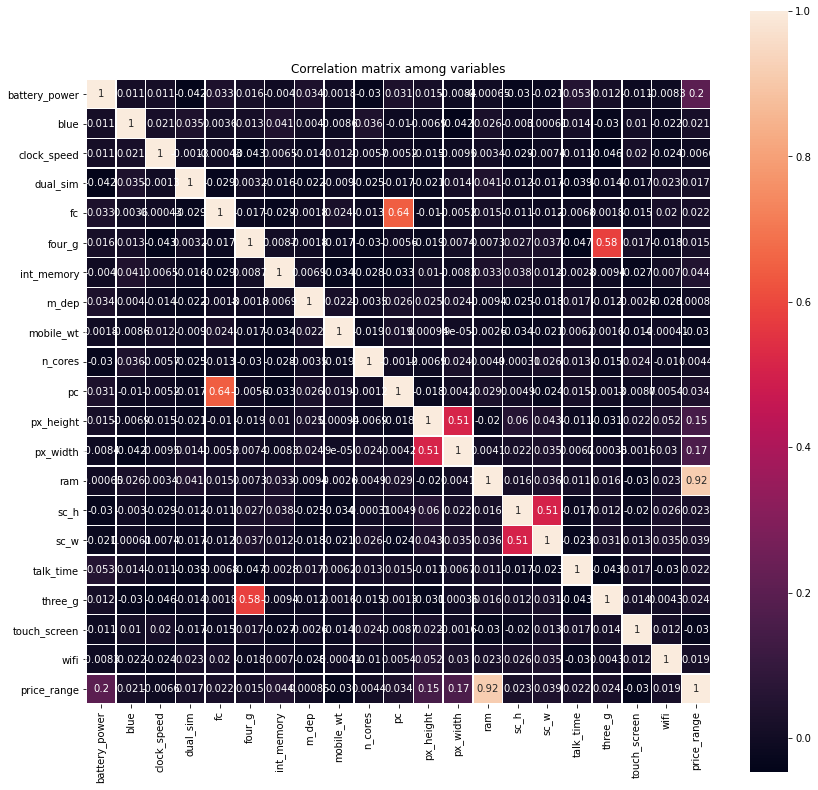

In [7]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

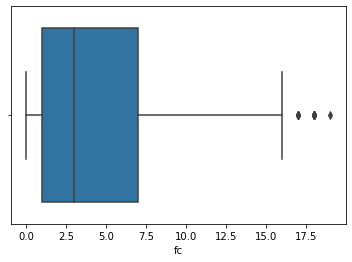

In [50]:
sns.boxplot(x='fc', data=df)

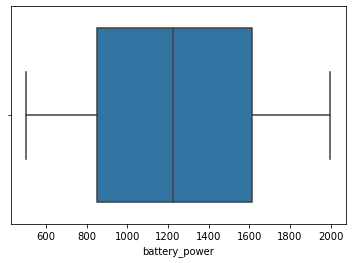

In [52]:
sns.boxplot(x='battery_power', data=df)

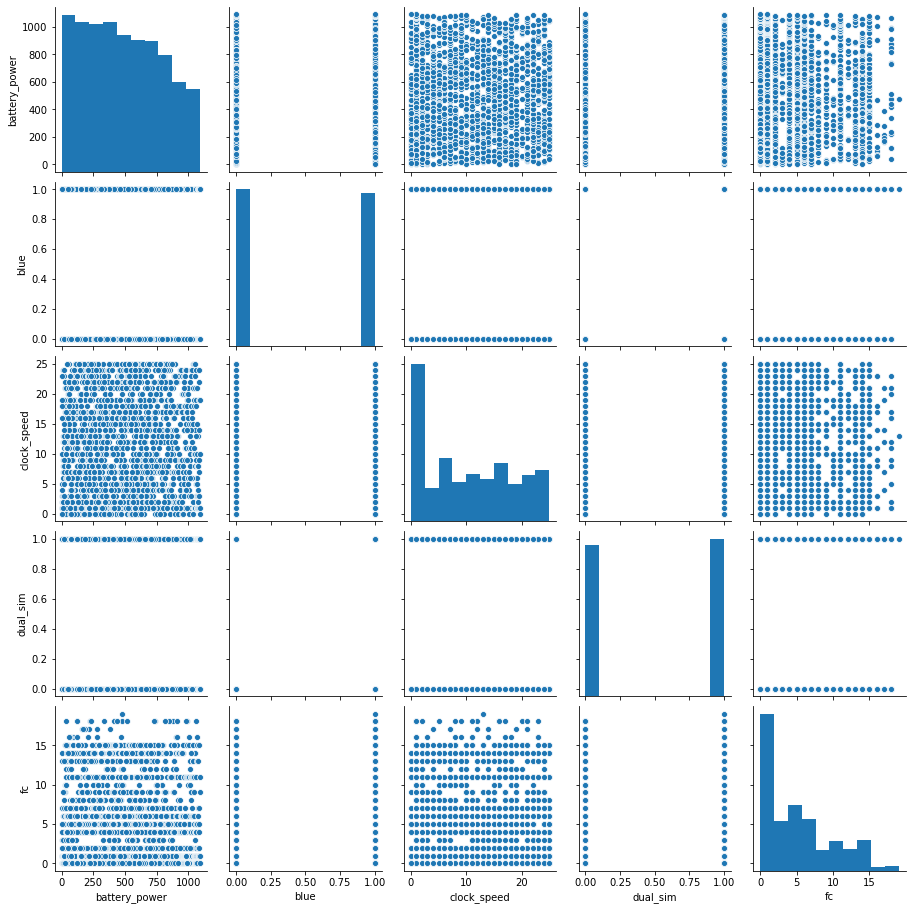

### Standartization

In [8]:
sc = StandardScaler()
df_x = sc.fit_transform(df.drop(columns = {'price_range'}))
df_y = df.price_range
df_x[:3]

array([[-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
        -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
        -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
         0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.98117712, -0.53209893,
         0.95788598,  0.49354568,  1.38116548,  0.13424391,  0.20963905,
        -0.64598879,  1.39268422,  1.07496821,  0.44149774, -0.31017108,
        -0.86492153, -0.36814045,  0.55964063,  0.99401789, -1.01409939]])

### Splitting into train and test data

In [9]:
train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(df_x, df_y, test_size=0.5, random_state=42)

print('train set shapes: ', train_set_x.shape, train_set_y.shape)
print('test set shapes: ', test_set_x.shape, test_set_y.shape)

train set shapes:  (1000, 20) (1000,)
test set shapes:  (1000, 20) (1000,)


## kNN

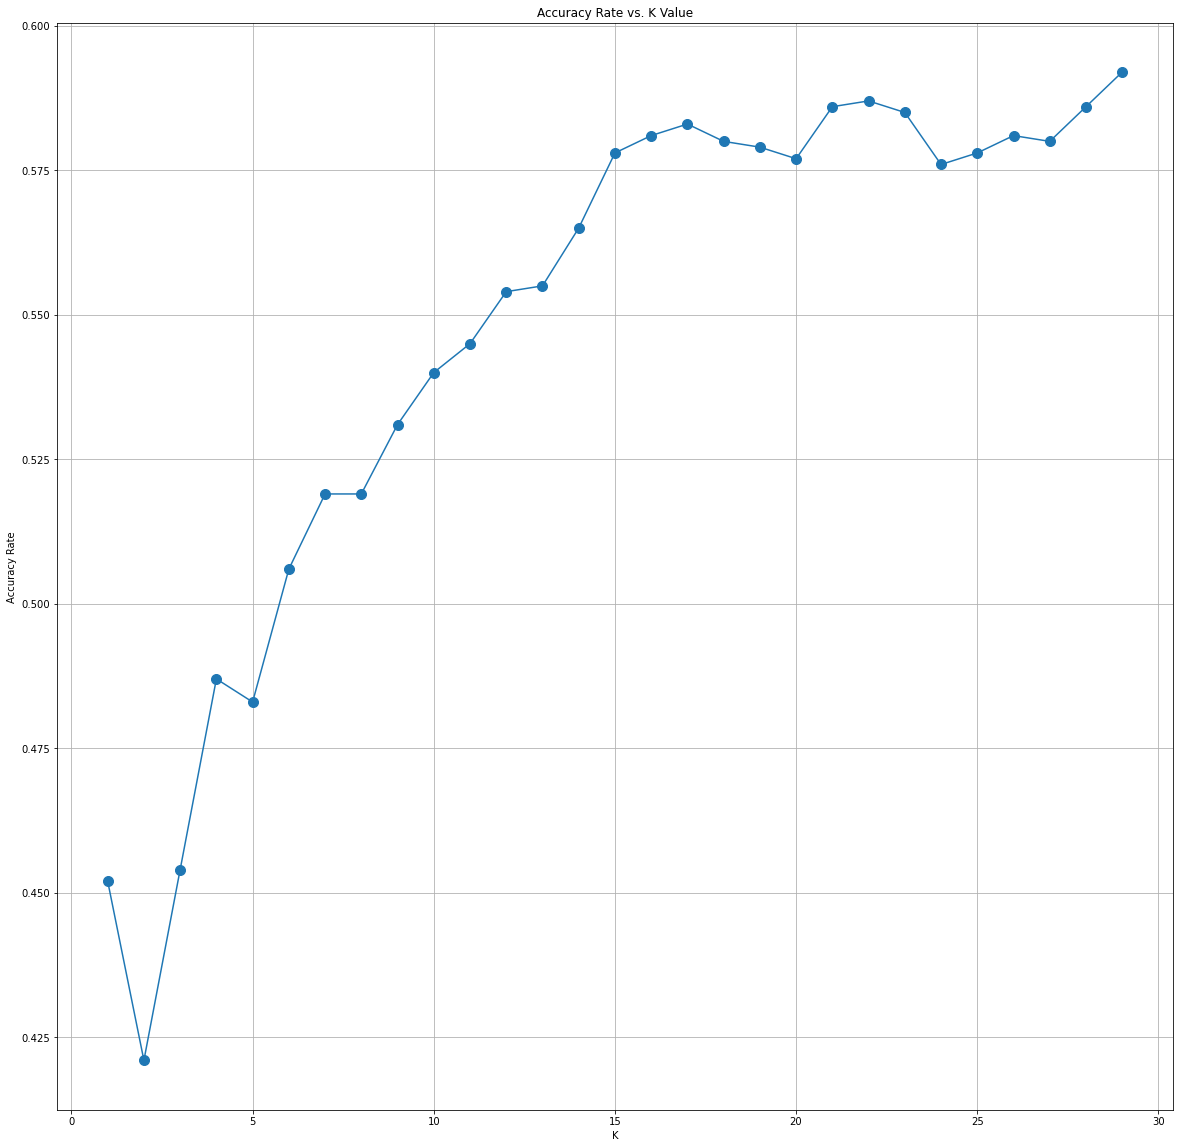

In [70]:
# Choosing a K Value
acc_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_set_x, train_set_y)
    pred_i = knn.predict(test_set_x)
    accuracy = accuracy_score(pred_i, test_set_y)
    acc_rate.append(accuracy)

plt.figure(figsize=(20, 20))
plt.plot(range(1,30), acc_rate, marker='o', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.grid()

In [71]:
print('Best k: ', np.argmax(acc_rate))
print('Best accuracy: ', np.max(acc_rate))

Best k:  28
Best accuracy:  0.592


In [72]:
print(classification_report(test_set_y,pred))
print(confusion_matrix(test_set_y, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       257
           1       0.91      0.94      0.93       248
           2       0.96      0.94      0.95       252
           3       0.97      0.98      0.98       243

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

[[244  13   0   0]
 [  8 234   6   0]
 [  0   9 236   7]
 [  0   0   4 239]]


## SVM

In [73]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(svm.SVC(), param_grid)
k = gs.fit(train_set_x, train_set_y)
print("accuracy  =", k.best_score_)
print("С =", k.best_params_['C'], "gamma =", k.best_params_['gamma'], "kernel =", k.best_params_['kernel'])

accuracy  = 0.929
С = 1000 gamma = 0.001 kernel = rbf


In [74]:
model =svm.SVC(kernel=k.best_params_['kernel'], C=k.best_params_['C'], gamma=k.best_params_['gamma'])
model.fit(train_set_x, train_set_y)
pred = model.predict(test_set_x)
print(accuracy_score(pred, test_set_y))

0.953


In [75]:
print(classification_report(test_set_y,pred))
print(confusion_matrix(test_set_y, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       257
           1       0.91      0.94      0.93       248
           2       0.96      0.94      0.95       252
           3       0.97      0.98      0.98       243

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

[[244  13   0   0]
 [  8 234   6   0]
 [  0   9 236   7]
 [  0   0   4 239]]


## DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(train_set_x, train_set_y.ravel())
y_train_pred = dt.predict(train_set_x)
y_test_pred = dt.predict(test_set_x)

print('accuracy(train): ', round(accuracy_score(train_set_y, y_train_pred)*100, 4))
print('accuracy(test): ', round(accuracy_score(test_set_y, y_test_pred)*100, 4))

accuracy(train):  83.0
accuracy(test):  80.3


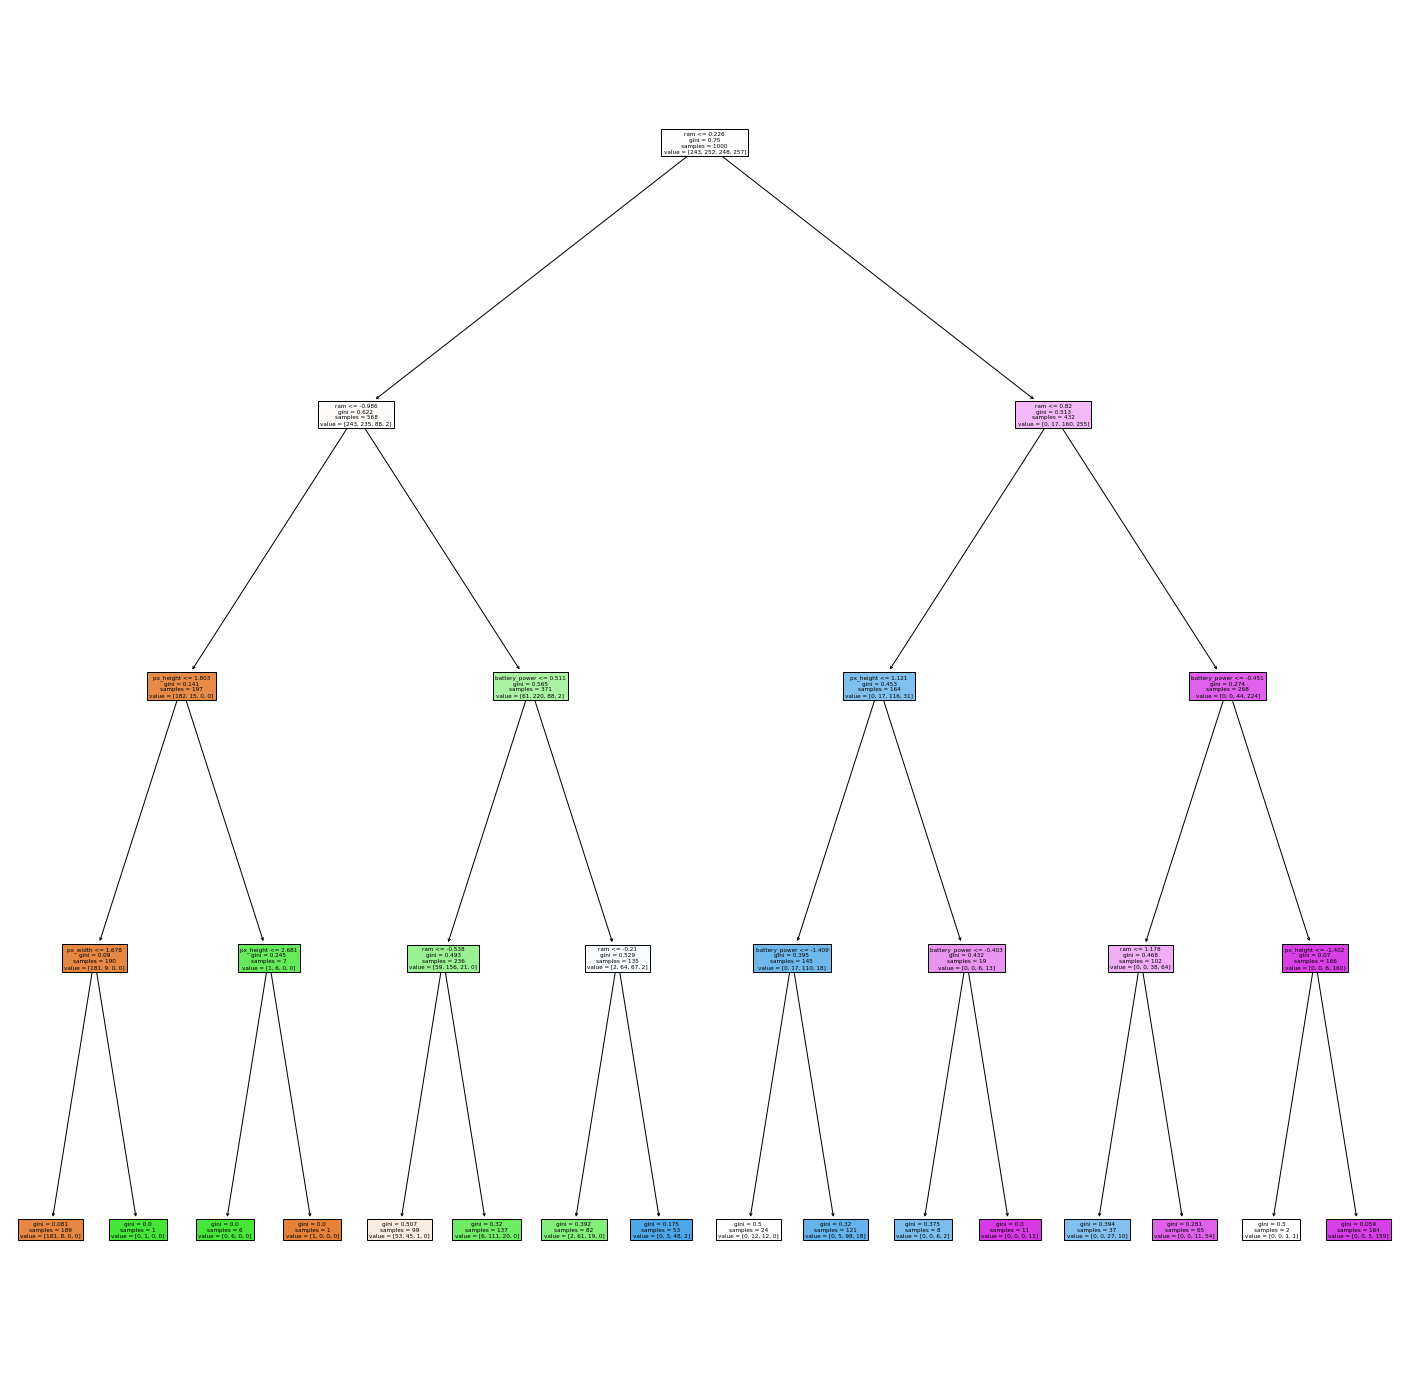

In [77]:
plt.figure(figsize=(25, 25))
plot_tree(dt, filled=True, feature_names=df.columns)
plt.show()

## Random forest

In [78]:
grid_params = {'max_depth': np.arange(1, 10), 'n_estimators': [150, 200, 250, 300]}
gs = GridSearchCV(RandomForestClassifier(), grid_params)
k = gs.fit(train_set_x, train_set_y)
print("accuracy =", k.best_score_)
print("max_depth =", k.best_params_['max_depth'], "n_estimators =", k.best_params_['n_estimators'])

accuracy = 0.8610000000000001
max_depth = 9 n_estimators = 300


In [79]:
model = RandomForestClassifier(max_depth=k.best_params_['max_depth'], n_estimators=k.best_params_['n_estimators'])
model.fit(train_set_x, train_set_y)
pred = model.predict(test_set_x)
print(accuracy_score(pred, test_set_y))

0.861


In [80]:
print(classification_report(test_set_y,pred))
print(confusion_matrix(test_set_y, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       257
           1       0.79      0.86      0.82       248
           2       0.83      0.72      0.77       252
           3       0.89      0.92      0.90       243

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

[[243  14   0   0]
 [ 19 213  16   0]
 [  0  43 182  27]
 [  0   0  20 223]]


## AdaBoost

In [81]:
grid_params = {'learning_rate':np.arange(0.2,1,0.2),'n_estimators': np.arange(50,200,50)}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)), grid_params, verbose = 5, n_jobs = -1, cv = 5)
k = gs.fit(train_set_x, train_set_y)
print("accuracy =",k.best_score_)
print("learning_rate =",k.best_params_['learning_rate'], "n_estimators =", k.best_params_['n_estimators'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.9s finished


accuracy = 0.861
learning_rate = 0.6000000000000001 n_estimators = 150


In [82]:
model = k.best_estimator_
model.fit(train_set_x, train_set_y)
pred = model.predict(test_set_x)
print(accuracy_score(pred,test_set_y))

0.85


In [83]:
print(classification_report(test_set_y,pred))
print(confusion_matrix(test_set_y, pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       257
           1       0.75      0.90      0.82       248
           2       0.81      0.81      0.81       252
           3       0.92      0.86      0.89       243

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000

[[215  42   0   0]
 [ 11 223  14   0]
 [  0  31 204  17]
 [  0   0  35 208]]
